In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.random.normal(10, size=(10, 2))
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
x_train, y_train

(array([[10.49055142,  9.80868954],
        [12.11878883, 11.13662473],
        [ 9.31182566,  8.90257563],
        [10.42599241, 11.31927097],
        [12.27956117,  9.34616857],
        [ 8.47363093,  9.62788147],
        [10.70425667,  9.73855364],
        [ 8.56800879,  9.7030709 ],
        [ 9.68521802, 10.95137702],
        [ 8.68828643,  7.87336524]]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))

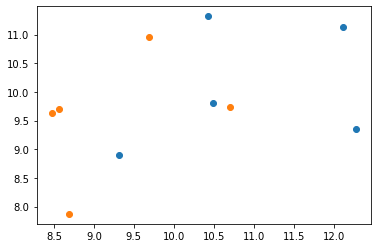

In [3]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1])
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1])

In [4]:
x = np.array([10, 10])

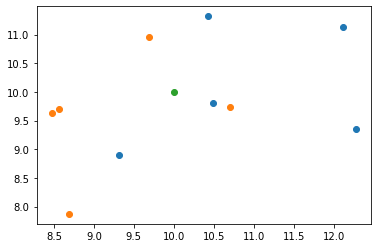

In [5]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1])
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1])
plt.scatter(x[0], x[1])

## kNN过程

In [6]:
import math

# 计算欧氏距离
distance = []
for i in x_train:
    d = math.sqrt(np.sum((i - x) ** 2))
    distance.append(d)

In [7]:
distance

[0.5265362194756925,
 2.404408846426935,
 1.2953471270111256,
 1.3863424678443237,
 2.3714752112325894,
 1.5710743870874266,
 0.7512201102362978,
 1.4624519565244651,
 1.0021007589040671,
 2.498633210298665]

In [8]:
# 距离远近
near = np.argsort(distance)
near

array([0, 6, 8, 2, 3, 7, 5, 4, 1, 9], dtype=int64)

In [9]:
# 计算过程
k = 6
topK_y = [y_train[i] for i in near[:k]]
topK_y

[0, 1, 1, 0, 0, 1]

In [10]:
from collections import Counter
Counter(topK_y)

Counter({0: 3, 1: 3})

In [11]:
votes = Counter(topK_y)
votes.most_common(1)[0][0]

0

## sklearn_kNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=6)

In [20]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [21]:
x = x.reshape(1, -1)

In [23]:
knn.predict(x)

array([0])

## 判断性能

In [27]:
from sklearn import datasets

In [32]:
iris = datasets.load_iris()
x_data, y_label = iris.data, iris.target

In [33]:
shuffle_idx = np.random.permutation(len(x_data))
shuffle_idx

array([ 86,  12, 113, 148,  57,  33,  92,  97,  15,  54,   8,  84, 149,
         0,   1,  67, 134, 124,  55,  90, 141,  58,  25, 125,  45,  69,
       128,   4,  32,  36,   2,  62, 109, 136, 122, 130,  29, 145,  40,
        71,  17,  47,  19, 127,  75,  52, 104,  59,  10,  93, 119,  64,
        26, 114,  13, 100, 129,  65,  16,  94,  51,  23, 117,   6, 121,
        39,  14, 101, 103,  82,  96, 131,  83,  22,  72, 102, 143, 146,
        41,  68, 132,   3, 142,  38, 123, 112,  56,  11, 126,   7, 118,
       108,  49, 147,  85,  79,  61,  76, 138,  37,   9,  46,  77,  35,
        50, 105,  53,  63, 137,  42,  98,  74,  43, 135,   5,  66, 133,
       139,  99,  91,  81,  24,  48,  95,  73, 111, 116,  21,  70,  18,
        80, 110,  28, 140, 144,  20, 120,  78,  34, 106,  60,  31,  88,
        44, 115,  30,  87,  89,  27, 107])

In [35]:
test_ratio = 0.2 # 测试集比例
test_size = int(len(x_data) * test_ratio) # 测试及大小
test_size

30

In [36]:
test_idx = shuffle_idx[:test_size]
train_idx = shuffle_idx[test_size:]

In [37]:
x_train, y_train, x_test, y_test = x_data[train_idx], y_label[train_idx], x_data[test_idx], y_label[test_idx]

In [38]:
x_train.shape

(120, 4)

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)

In [40]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [43]:
y_pred = knn.predict(x_test)

In [45]:
sum(y_pred == y_test) / len(y_test)

1.0

## train_test_split

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, y_train, x_test, y_test = train_test_split(x_data, y_label, test_size=0.3)

In [50]:
x_train

array([[7.3, 2.9, 6.3, 1.8],
       [5.6, 2.7, 4.2, 1.3],
       [7.7, 2.8, 6.7, 2. ],
       [6.1, 2.8, 4.7, 1.2],
       [4.8, 3.4, 1.9, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.5, 2.4, 3.8, 1.1],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 2.3, 4. , 1.3],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 4.2, 1.4, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 3.3, 6. , 2.5],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.2, 5. , 1.5],
       [6.8, 3. , 5.5, 2.1],
       [5.4, 3.9, 1.3, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.2, 2.9, 4.3, 1.3],
       [6.8, 2.8, 4.8, 1.4],
       [5.7, 2.5, 5. , 2. ],
       [5.7, 4.4, 1.5, 0.4],
       [5. , 3.5, 1.6, 0.6],
       [5.8, 2.7, 3.9, 1.2],
       [6.3, 3.3, 4.7, 1.6],
       [5.6, 3. , 4.5, 1.5],
       [4.3, 3. , 1.1, 0.1],
       [4.4, 2.9, 1.4, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [5.8, 2.8, 5.1, 2.4],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 4.9, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [6.3, 2

# MNIST

In [51]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [53]:
x, y = digits.data, digits.target

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train.shape, y_train.shape

((1347, 64), (1347,))

In [62]:
import matplotlib

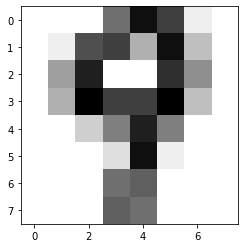

In [63]:
img = x_train[0].reshape(8, 8)
plt.imshow(img, cmap=matplotlib.cm.binary)

In [70]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [73]:
y_pred = knn.predict(x_test)
y_pred

array([6, 7, 2, 4, 4, 9, 2, 3, 6, 0, 9, 9, 6, 2, 1, 5, 1, 8, 9, 2, 6, 8,
       1, 5, 0, 8, 4, 4, 0, 7, 2, 0, 7, 6, 3, 5, 8, 0, 1, 4, 5, 4, 5, 2,
       1, 4, 0, 5, 0, 7, 3, 2, 5, 1, 0, 4, 3, 2, 9, 0, 5, 3, 3, 5, 6, 5,
       3, 3, 5, 3, 6, 4, 3, 4, 1, 0, 0, 3, 1, 4, 1, 3, 9, 7, 4, 0, 8, 3,
       7, 1, 8, 1, 6, 9, 6, 1, 0, 2, 8, 3, 4, 2, 2, 1, 0, 2, 8, 0, 4, 8,
       8, 3, 5, 0, 6, 7, 9, 7, 0, 2, 2, 7, 0, 7, 8, 4, 8, 1, 9, 1, 5, 6,
       0, 8, 7, 2, 6, 2, 6, 9, 6, 1, 3, 1, 5, 2, 2, 7, 1, 4, 3, 3, 4, 0,
       8, 6, 4, 7, 7, 8, 6, 2, 5, 2, 1, 0, 6, 6, 7, 9, 2, 0, 5, 0, 7, 2,
       0, 1, 2, 1, 5, 2, 6, 0, 0, 5, 3, 8, 0, 2, 9, 6, 6, 1, 7, 8, 7, 8,
       7, 2, 5, 3, 4, 8, 2, 9, 8, 2, 2, 7, 0, 1, 5, 1, 6, 7, 2, 8, 5, 3,
       0, 3, 0, 9, 8, 2, 2, 1, 6, 4, 8, 0, 4, 4, 1, 5, 2, 0, 2, 6, 4, 4,
       8, 3, 6, 7, 8, 4, 5, 5, 0, 8, 8, 8, 5, 4, 3, 9, 9, 5, 9, 3, 0, 0,
       0, 0, 5, 7, 8, 4, 1, 0, 4, 8, 9, 4, 3, 0, 1, 6, 7, 1, 4, 3, 5, 0,
       5, 6, 5, 8, 0, 7, 7, 2, 1, 6, 2, 7, 1, 9, 9,

In [75]:
sum(y_pred == y_test) / len(y_test)

0.9933333333333333

## accuracy_sorce

In [76]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9933333333333333

## grid_search

In [82]:
param_grid = [
    {
        'weights' : ['uniform'],
        'n_neighbors' : [i for i in range(1, 10)]
    },
    {
        'weights' : ['distance'],
        'n_neighbors' : [i for i in range(1, 10)],
        'p' : [i for i in range(1, 6)]
    }
]

In [78]:
knn = KNeighborsClassifier()

In [79]:
from sklearn.model_selection import GridSearchCV

In [83]:
grid_search = GridSearchCV(knn, param_grid)

In [84]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [85]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=3,
                     weights='distance')

In [86]:
grid_search.best_params_

{'n_neighbors': 4, 'p': 3, 'weights': 'distance'}

In [87]:
knn = grid_search.best_estimator_

In [92]:
knn.score(x_test, y_test)

0.9933333333333333

### GridSearchCV(knn, param_grid, n_jobs=-1, verbose=2)

In [93]:
grid_search = GridSearchCV(knn, param_grid, n_jobs=-1, verbose=2)

In [95]:
%%time
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.3s


Wall time: 27.2 s


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   27.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=4, p=3,
                                            weights='distance'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

## 数据归一化

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
standar = StandardScaler()

In [98]:
standar.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
standar.mean_ # 均值

array([0.00000000e+00, 2.99925761e-01, 5.19005197e+00, 1.18025241e+01,
       1.20460282e+01, 5.92873051e+00, 1.34669636e+00, 1.28433556e-01,
       3.71195249e-03, 1.98440980e+00, 1.03845583e+01, 1.19651076e+01,
       1.03162584e+01, 8.21455085e+00, 1.87453601e+00, 1.25463994e-01,
       2.22717149e-03, 2.62731997e+00, 9.97327394e+00, 6.98812175e+00,
       7.02301411e+00, 7.76243504e+00, 1.80326652e+00, 5.86488493e-02,
       7.42390497e-04, 2.51893096e+00, 9.24721604e+00, 8.91314031e+00,
       9.96436526e+00, 7.61618411e+00, 2.32442465e+00, 2.22717149e-03,
       0.00000000e+00, 2.36896808e+00, 7.74536006e+00, 9.12249443e+00,
       1.03860431e+01, 8.84038604e+00, 2.92501856e+00, 0.00000000e+00,
       9.65107647e-03, 1.57535264e+00, 6.74461767e+00, 7.10838901e+00,
       7.71343727e+00, 8.32293987e+00, 3.48552339e+00, 3.26651819e-02,
       8.90868597e-03, 7.11210097e-01, 7.31848552e+00, 9.47364514e+00,
       9.37416481e+00, 8.68002970e+00, 3.73942094e+00, 2.04899777e-01,
      

In [101]:
standar.scale_ # 标准差

array([1.        , 0.90974677, 4.73823685, 4.260057  , 4.21147954,
       5.66375038, 3.2824354 , 1.03278873, 0.07199274, 3.17056252,
       5.43209405, 3.92499841, 4.71167766, 6.07286826, 3.63720327,
       0.92148994, 0.06088507, 3.63343733, 5.70071681, 5.81589673,
       6.14972109, 6.17608357, 3.34624807, 0.47691064, 0.02723673,
       3.16934407, 6.14998609, 5.84105465, 6.11242661, 5.86463026,
       3.73244233, 0.04714034, 1.        , 3.51723119, 6.34317166,
       6.24010953, 5.91973394, 5.85779787, 3.53867453, 1.        ,
       0.146411  , 2.98612253, 6.556711  , 6.41720585, 6.2676854 ,
       5.71784746, 4.35152378, 0.34739751, 0.23421685, 1.74223502,
       5.65372795, 5.28418902, 5.32516688, 6.04493768, 4.93833817,
       0.97612466, 0.02723673, 0.93663852, 5.08405588, 4.37942302,
       4.96298314, 5.9318833 , 4.18121473, 1.91757181])

In [102]:
standar.transform(x_train)

array([[ 0.        , -0.32968049, -1.09535512, ...,  1.55214229,
         0.92541032, -0.20093155],
       [ 0.        , -0.32968049, -0.46220821, ...,  1.55214229,
         3.3170598 ,  1.36354703],
       [ 0.        , -0.32968049, -0.67325718, ..., -0.97656558,
        -0.50957936, -0.20093155],
       ...,
       [ 0.        ,  1.86873346,  2.07037942, ..., -1.1451461 ,
        -0.50957936, -0.20093155],
       [ 0.        , -0.32968049, -0.88430615, ..., -0.97656558,
        -0.50957936, -0.20093155],
       [ 0.        , -0.32968049, -0.25115924, ...,  0.20349809,
        -0.50957936, -0.20093155]])

In [103]:
x_train_standar = standar.transform(x_train)
x_test_standar = standar.transform(x_test)

In [104]:
knn = KNeighborsClassifier()
knn.fit(x_train_standar, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [105]:
knn.score(x_test_standar, y_test)

0.9755555555555555